In [8]:
## Machine Learning Online Class - Exercise 2: Logistic Regression
#
#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the second part
#  of the exercise which covers regularization with logistic regression.
#
#  You will need to complete the following functions in this exericse:
#
#     sigmoid.m
#     costFunction.m
#     predict.m
#     costFunctionReg.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

## Initialization
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import optimize
import importlib
import library as lib
importlib.reload(lib)

## Load Data
#  The first two columns contains the X values and the third column
#  contains the label (y).

data = pd.read_csv('ex2data2.txt',header = None);
X = data.iloc[:, [0, 1]]; y = data.iloc[:, 2]

In [41]:
print(X.head())
print(y.head())

          0        1
0  0.051267  0.69956
1 -0.092742  0.68494
2 -0.213710  0.69225
3 -0.375000  0.50219
4 -0.513250  0.46564
0    1
1    1
2    1
3    1
4    1
Name: 2, dtype: int64


In [2]:
y.values.reshape(-1,1)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [9]:
X = np.array(X)
y = y.values.reshape(-1,1)

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

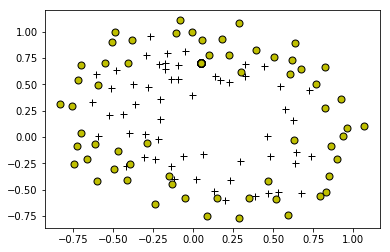

In [44]:

# 能否实现在定义PlotData函数但不输出图形，在下面继续添加坐标轴标签和图例后再输出？
import importlib
import library as lib
importlib.reload(lib)
lib.plotData(X,y)


C:\Anaconda3\lib\site-packages\matplotlib\legend.py:623: UserWarning: Legend does not support 'y' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Anaconda3\lib\site-packages\matplotlib\legend.py:623: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Anaconda3\lib\site-packages\matplotlib\legend.py:623: UserWarning: Legend does not support '=' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Anaconda3\lib\site-packages\matplotlib\legend.py:623: UserWarning: Legend does not support '1' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#usin

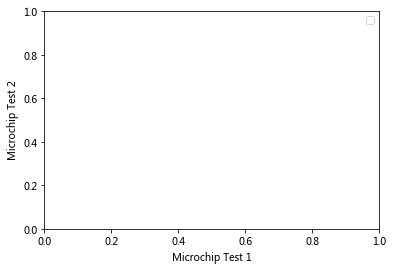

In [21]:
# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# Specified in plot order
plt.legend('y = 1', 'y = 0')


In [103]:
X

array([[  1.00000000e+00,   5.12670000e-02,   6.99560000e-01, ...,
          6.29470940e-04,   8.58939846e-03,   1.17205992e-01],
       [  1.00000000e+00,  -9.27420000e-02,   6.84940000e-01, ...,
          1.89305413e-03,  -1.39810280e-02,   1.03255971e-01],
       [  1.00000000e+00,  -2.13710000e-01,   6.92250000e-01, ...,
          1.04882142e-02,  -3.39734512e-02,   1.10046893e-01],
       ..., 
       [  1.00000000e+00,  -4.84450000e-01,   9.99270000e-01, ...,
          2.34007252e-01,  -4.82684337e-01,   9.95627986e-01],
       [  1.00000000e+00,  -6.33640000e-03,   9.99270000e-01, ...,
          4.00328554e-05,  -6.31330588e-03,   9.95627986e-01],
       [  1.00000000e+00,   6.32650000e-01,  -3.06120000e-02, ...,
          3.51474517e-07,  -1.70067777e-08,   8.22905998e-10]])

Cost Function with Regularization
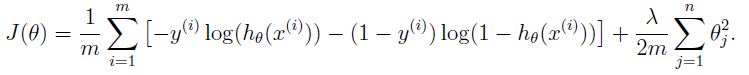

带正则化惩罚项的梯度
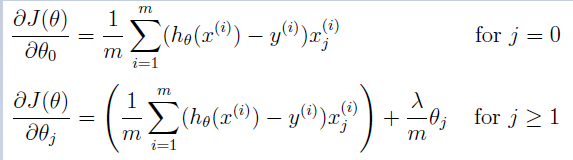

In [10]:
data = pd.read_csv('ex2data2.txt',header = None);
X = data.iloc[:, [0, 1]]; y = data.iloc[:, 2]
X = np.array(X)
y = y.values.reshape(-1,1)

In [4]:
def costFunctionReg(theta, X, y, plambda):
    #COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    #   J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    #   theta as the parameter for regularized logistic regression and the
    #   gradient of the cost w.r.t. to the parameters. 

    # Initialize some useful values
    m = len(y); # number of training examples
    theta = theta.reshape(-1,1)
    
    # You need to return the following variables correctly 
    J = 0;
    grad = np.zeros(len(theta));

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    h = lib.sigmoid(np.dot(X, theta))
    theta_1 = theta[1:]
    J = (1/m)*np.sum(-y*np.log(h)-(1-y)*np.log(1-h)) + 0.5*plambda*np.dot(theta_1.T, theta_1)/m

    #grad = (np.dot(X.T,h-y))/m #theta0 without regularization
    #grad[1:] += plambda*theta_1 /m
    #return J, grad 
    return J

In [5]:
def gradientReg(theta, X, y, plambda):
    # 和MATLAB中的实现不同，Python需要单独的梯度函数作为参数传递给最优化算法
    # 为符合最优化算法的规则，参数theta需要是一维数组
    m = len(y);
    J = 0;
    theta = theta.reshape(-1,1)
    grad = np.zeros(len(theta));
    
    h = lib.sigmoid(np.dot(X, theta))
    theta_1 = theta[1:]
    
    grad = (np.dot(X.T,h-y))/m #theta0 without regularization
    grad[1:] += plambda*theta_1 /m
    
    return grad.ravel() #作为最优化方法的fprime参数输入，是一个一维数组

In [21]:
import importlib
import library as lib
importlib.reload(lib)

data = pd.read_csv('ex2data2.txt',header = None);
X = data.iloc[:, [0, 1]]; y = data.iloc[:, 2]
X = np.array(X)
y = y.values.reshape(-1,1)

In [22]:
X

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [23]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [185]:
## =========== Part 1: Regularized Logistic Regression ============
#  In this part, you are given a dataset with data points that are not
#  linearly separable. However, you would still like to use logistic
#  regression to classify the data points.
#
#  To do so, you introduce more features to use -- in particular, you add
#  polynomial features to our data matrix (similar to polynomial
#  regression).
#

# Add Polynomial Features

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
#X = library.mapFeature(X[:,0], X[:,1]);
X = lib.mapFeature(X[:,0], X[:,1])

#print("X:")
#print(X)

# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
plambda = 1;

# Compute and display initial cost and gradient for regularized logistic
# regression
cost = costFunctionReg(initial_theta, X, y, plambda);
grad = gradientReg(initial_theta, X, y, plambda);

print('Cost at initial theta (zeros): %f\n'%cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros) - first five values only:\n');
print(grad[:5]);
print('Expected gradients (approx) - first five values only:\n');
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((X.shape[1],1))
cost = costFunctionReg(test_theta, X, y, 10);
grad = gradientReg(test_theta, X, y, 10);

print('\nCost at test theta (with lambda = 10): %f\n'%cost);
print('Expected cost (approx): 3.16\n');
print('Gradient at test theta - first five values only:\n');
print(grad[:5]);
print('Expected gradients (approx) - first five values only:\n');
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');

Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[  8.47457627e-03   1.87880932e-02   7.77711864e-05   5.03446395e-02
   1.15013308e-02]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Cost at test theta (with lambda = 10): 3.164509

Expected cost (approx): 3.16

Gradient at test theta - first five values only:

[ 0.34604507  0.16135192  0.19479576  0.22686278  0.09218568]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



In [15]:
import sys
sys.path.append(r"..")
import lib.math as math
import lib.calc as calc

In [16]:
def lrCostFunction(theta, X, y, plambda):
    #LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
    #regularization
    #   J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
    #   theta as the parameter for regularized logistic regression and the
    #   gradient of the cost w.r.t. to the parameters. 

    # Initialize some useful values
    m = len(y); # number of training examples

    # You need to return the following variables correctly 
    J = 0;
    grad = np.zeros(len(theta));

    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    #
    # Hint: The computation of the cost function and gradients can be
    #       efficiently vectorized. For example, consider the computation
    #
    #           sigmoid(X * theta)
    #
    #       Each row of the resulting matrix will contain the value of the
    #       prediction for that example. You can make use of this to vectorize
    #       the cost function and gradient computations. 
    #
    # Hint: When computing the gradient of the regularized cost function, 
    #       there're many possible vectorized solutions, but one solution
    #       looks like:
    #           grad = (unregularized gradient for logistic regression)
    #           temp = theta; 
    #           temp(1) = 0;   # because we don't add anything for j = 0  
    #           grad = grad + YOUR_CODE_HERE (using the temp variable)
    #

    h = math.sigmoid(X.dot(theta))
    theta_1 = theta[1:]
    #J = -(y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h))) / m + 0.5*plambda*(theta_1.T.dot(theta_1))/m
    J = -(y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h))) / m + 0.5*plambda*np.dot(theta_1.T,theta_1)/m

    #J[1:] += 0.5*plambda*(theta_1.T.dot(theta_1))/m

    grad = (X.T.dot(h-y))/m
    grad[1:] += plambda*theta_1/m
    return J, grad
    # =============================================================

In [20]:
#test the cost function implemented in ex3
X = lib.mapFeature(X[:,0], X[:,1])

#print("X:")
#print(X)

# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
plambda = 1;

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = lrCostFunction(initial_theta, X, y, plambda);


print('Cost at initial theta (zeros): %f\n'%cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros) - first five values only:\n');
print(grad[:5]);
print('Expected gradients (approx) - first five values only:\n');
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n');


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((X.shape[1],1))
cost, grad = lrCostFunction(test_theta, X, y, 10);


print('\nCost at test theta (with lambda = 10): %f\n'%cost);
print('Expected cost (approx): 3.16\n');
print('Gradient at test theta - first five values only:\n');
print(grad[:5]);
print('Expected gradients (approx) - first five values only:\n');
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n');

Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

[[  8.47457627e-03]
 [  1.87880932e-02]
 [  7.77711864e-05]
 [  5.03446395e-02]
 [  1.15013308e-02]]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Cost at test theta (with lambda = 10): 3.164509

Expected cost (approx): 3.16

Gradient at test theta - first five values only:

[[ 0.34604507]
 [ 0.16135192]
 [ 0.19479576]
 [ 0.22686278]
 [ 0.09218568]]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


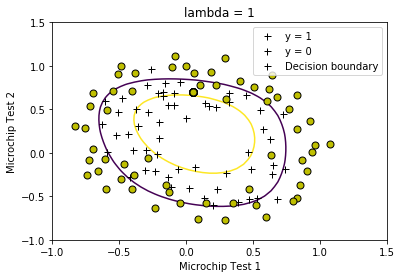

Train Accuracy: 83.050847

Expected accuracy (with lambda = 1): 83.1 (approx)



In [191]:
## ============= Part 2: Regularization and Accuracies =============
#  Optional Exercise:
#  In this part, you will get to try different values of lambda and
#  see how regularization affects the decision coundart
#
#  Try the following values of lambda (0, 1, 10, 100).
#
#  How does the decision boundary change when you vary lambda? How does
#  the training set accuracy vary?
#

# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1 (you should vary this)
plambda = 1;

# Set Options
#options = optimset('GradObj', 'on', 'MaxIter', 400);

# Optimize
#[theta, J, exit_flag] = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);
theta = optimize.fmin_bfgs(costFunctionReg, initial_theta.ravel(), fprime=gradientReg, args=(X, y, plambda), maxiter = 400)
#optimize.fmin_bfgs(costFunctionReg, initial_theta.ravel(), args=(X, y, plambda), maxiter = 400)



# Plot Boundary
lib.plotDecisionBoundary(theta, X, y);

plt.title('lambda = %g'%plambda)

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

plt.legend(['y = 1', 'y = 0', 'Decision boundary']) #图标不对
plt.show()


# Compute accuracy on our training set
p = lib.predict(theta, X);

print('Train Accuracy: %f\n'%(np.mean(np.double(p == y)) * 100))
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n');


In [27]:
np.where(y==1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

         Current function value: 0.263499
         Iterations: 400
         Function evaluations: 401
         Gradient evaluations: 401


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


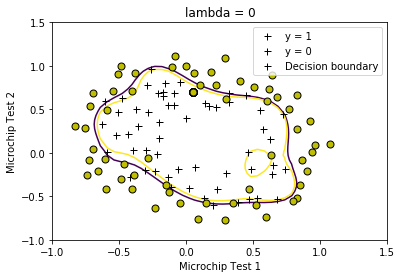

In [193]:
plambda = 0;

# Optimize

theta = optimize.fmin_bfgs(costFunctionReg, initial_theta.ravel(), fprime=gradientReg, args=(X, y, plambda), maxiter = 400)
#optimize.fmin_bfgs(costFunctionReg, initial_theta.ravel(), args=(X, y, plambda), maxiter = 400)

# Plot Boundary
lib.plotDecisionBoundary(theta, X, y);

plt.title('lambda = %g'%plambda)

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

plt.legend(['y = 1', 'y = 0', 'Decision boundary']) #图标不对
plt.show()

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


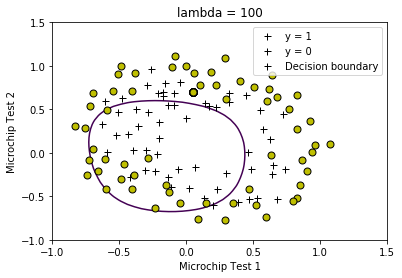

In [194]:
plambda = 100;

# Optimize

theta = optimize.fmin_bfgs(costFunctionReg, initial_theta.ravel(), fprime=gradientReg, args=(X, y, plambda), maxiter = 400)
#optimize.fmin_bfgs(costFunctionReg, initial_theta.ravel(), args=(X, y, plambda), maxiter = 400)

# Plot Boundary
lib.plotDecisionBoundary(theta, X, y);

plt.title('lambda = %g'%plambda)

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

plt.legend(['y = 1', 'y = 0', 'Decision boundary']) #图标不对
plt.show()

In [68]:
u = np.linspace(-1, 1.5, 50);v=np.linspace(-1, 1.5, 50)

In [108]:
lib.mapFeature(u(i), v(j))

NameError: name 'i' is not defined

In [117]:
[0, 0]

[0, 0]

In [174]:
np.double(1==0.5)

0.0